In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Bradford\Dissertation\Data\research_dataset.csv")

data["UUU"] = pd.to_numeric(data["UUU"], errors = 'coerce')
data["UUC"] = pd.to_numeric(data["UUC"], errors = 'coerce')

data = data.replace(np.nan, 0, regex=True)

data = data.reset_index()

data.head(2)

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,index,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,bct,0,43130,10120,Onion yellow dwarf virus,0.02421,0.01591,0.02233,0.01798,...,0.00336,0.01443,0.00593,0.04397,0.01996,0.04012,0.02223,0.00000,0.00000,0.00030
1,1,bct,0,105154,1455,Chlamydia phage Chp2,0.03505,0.01787,0.02405,0.01856,...,0.00481,0.01993,0.01031,0.04192,0.00962,0.02818,0.03024,0.00137,0.00344,0.00069


In [5]:
x =  np.array(data.iloc[:, 6:69])
y = np.array(data.iloc[:, [1]])
y

array([['bct'],
       ['bct'],
       ['bct'],
       ...,
       ['vrt'],
       ['vrt'],
       ['vrt']], dtype=object)

In [6]:
y

array([['bct'],
       ['bct'],
       ['bct'],
       ...,
       ['vrt'],
       ['vrt'],
       ['vrt']], dtype=object)

## Train and Test Split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB
MultiNB = MultinomialNB(alpha = 1.0, fit_prior=True, class_prior=None)
MultiNB.fit(x_train, y_train.ravel())

ValueError: Negative values in data passed to MultinomialNB (input X)

In [10]:
from sklearn.naive_bayes import GaussianNB
GausNB = GaussianNB()
GausNB.fit(x_train, y_train.ravel())

GaussianNB()

In [ ]:
MultiNB.score(x_test, y_test)

In [ ]:
y_predMultiNB = MultiNB.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predMultiNB))
print(confusion_matrix(y_test, y_predMultiNB)) 

Multicm = confusion_matrix(y_test, y_predMultiNB)
Multicm

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(Multicm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [11]:
GausNB.score(x_test, y_test)

0.6581632653061225

In [12]:
y_predGausNB = GausNB.predict(x_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predGausNB))
print(confusion_matrix(y_test, y_predGausNB)) 

Gauscm = confusion_matrix(y_test, y_predGausNB)
Gauscm

              precision    recall  f1-score   support

         bct       0.75      0.59      0.66       577
         inv       0.38      0.39      0.38       287
         pln       0.57      0.78      0.66       494
         vrt       0.97      0.80      0.87       406

    accuracy                           0.66      1764
   macro avg       0.67      0.64      0.64      1764
weighted avg       0.69      0.66      0.66      1764

[[342  96 139   0]
 [ 45 112 120  10]
 [ 60  50 384   0]
 [ 11  38  34 323]]


array([[342,  96, 139,   0],
       [ 45, 112, 120,  10],
       [ 60,  50, 384,   0],
       [ 11,  38,  34, 323]], dtype=int64)

Text(69.0, 0.5, 'Truth')

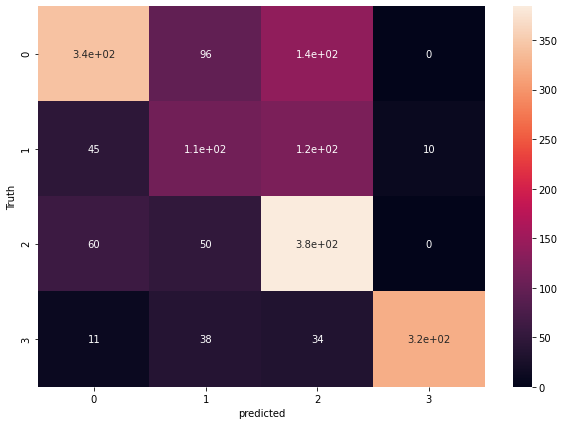

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(Gauscm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')